# MaxCut problem definition


*MaxCut* consists of partitioning a graph's vertices into two different sets. The goal of this partitioning is to maximize the number of cuts necessary to separate these two sets. In other words, *MaxCut* tries to maximize the number of edges shared between the two sets.

*MaxCut* is considered an NP-Hard problem which means that the cost to solving this algorithm classically grows exponentially with the number of nodes in the graph. 

To demonstrate the *MaxCut* problem we need to first define a graph.

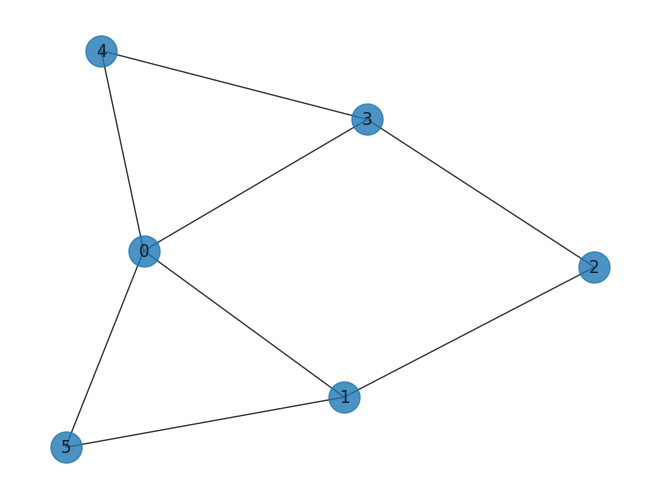

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from([0, 1, 2, 3, 4, 5])
graph.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0), (3, 4), (4, 0), (5,1), (5,0)])
nx.draw(graph, with_labels=True, alpha=0.8, node_size=500)


An example of the colored indices can be seen bellow:

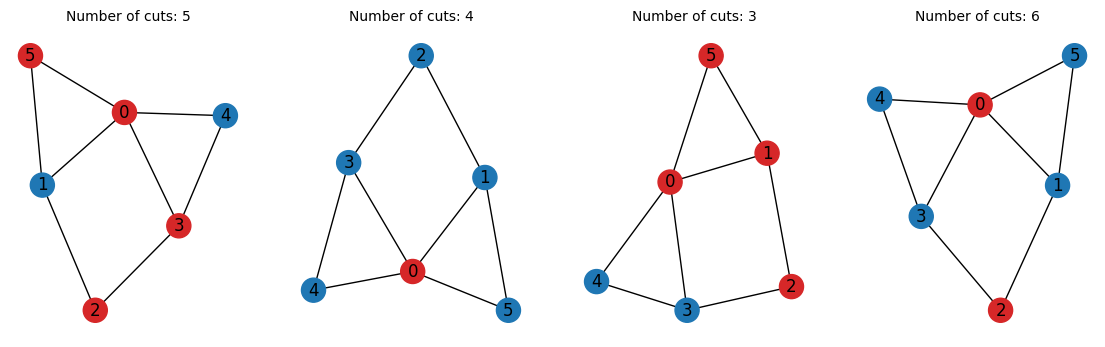

In [15]:
def color_graph(graph, bitstring: str, ax=None):
    '''
        color the vertices of a graph with blue and red corresponding to the '0's and '1's specified in the bit-string respectively.

        args:
            graph: graph 
                A network graph

            bitstring: bit-string 
                    a bit-string defining the colors of each of the vertices

            ax: Matplotlib Axes object, optional
                Draw the graph in specified Matplotlib axes.
    '''

    color_map = []
    for b in list(bitstring):
        color_map.append("tab:blue" if b == '0' else "tab:red")
    
    nx.draw(graph, node_color=color_map, with_labels=True, ax=ax)
    
        


num_graphs = 4
fig, ax = plt.subplots(ncols=num_graphs, figsize=(14, 4))

titles = [ 'Number of cuts: 5', 'Number of cuts: 4', 'Number of cuts: 3', 'Number of cuts: 6' ]
bitstrings = ["101101", "100000", "111001", "101000"]
for i in range(num_graphs):
    color_graph(graph, bitstrings[i], ax=ax[i])
    ax[i].set_title(titles[i], fontsize=10)

plt.show()


The goal is to find the optimal bit-string that would maximize the number of edges connecting the red and blue nodes. 

Each bit $b_i$ in the bit-string will represent a node in the graph, and we can define the following encoding for each of the bits:

$$ 
b_i = \begin{cases} 
            1 & \text{node belongs to the red subset} \\
            0 & \text{node belongs to the blue subset}
         \end{cases}
$$

We can define a mathematical expression $C$ to evaluate the cost of a given bit-string: 

<!-- $$C = \sum_{i,j=1}^{N} w_{ij}$$ -->

$$C = \sum_{j=0}^{N}\sum_{i=0}^{N} c_{ij}$$

where

$$c_{ij} = w_{ij} (b_i + b_j - 2 b_i * b_j),$$

and $b_i$ is the bit $i$ in the bit-string (aka. the node $i$ in the graph), $N$ is the total number of nodes in the graph, and 
$$ 
w_{ij} = \begin{cases} 
            1 & \text{if nodes $i$ and $j$ are connected} \\
            0 & \text{otherwise}.
         \end{cases}
$$

We can see that for a given $b_i$ and a $b_j$, $c_{ij}$ will only return a $1$ if and only if $b_i$ and $b_j$ are connected and belong to different subsets. The following table shows the values that $c_{ij}$ will return for a given $i$ and $j$ with respect to the variables $b_i$ and $b_j$ and the parameter $w_{ij}$:

<center>

| $b_i$ | $b_j$   | $w_{ij}$   | $c_{ij}$|
|-------|:-------:|:----------:|---:|
| 0     | 1       | 1          | 1  |
| 1     | 0       | 1          | 1  |
| 0     | 0       | 1          | 0  |
| 1     | 1       | 1          | 0  |
| 0     | 0       | 0          | 0  |
| 1     | 1       | 0          | 0  |
| 0     | 1       | 0          | 0  |
| 1     | 0       | 0          | 0  |

</center>


The final cost function $C$ computes the number of cuts in the graph given a specific bit-string. We can use optimization techniques to find the bit-string that maximizes $C$ which would be the optimal bit-string we are looking for. 

There are several classical approaches to solve this problem. However, this problem is known to be NP-hard, which means that it cannot be solved in polynomial time on a classical computer. The reason for this lies in the sheer number of possible states that need to be considered during optimization. For a fully connected graph with $N$ nodes, there are $2^N$  possible states, making it computationally infeasible for classical computers to handle large graphs efficiently.

There are multiple ways that we can use quantum devices to potentially provide advantage in solving this problem. In this Hackathon we will explore two algorithms that we can use to solve this problem on a quantum computer:

**Quantum Approximate Optimization Algorithm (QAOA)** is a variational algorithm that runs on digital quantum devices. It combines classical and quantum computation to solve optimization problems. Nevertheless, as the name states QAOA provides an approximate solution to the optimization problem that is as close as possible to the optimal one.

QAOA consists of applying two unitary operators sequentially on an initial state. The first unitary operator encodes the problem at hand and is known as the phase separation operator. While the second unitary operator is called the "mixer" operator.

More resources: 
- [Farhi, E., Goldstone, J. and Gutmann, S. (2014). A Quantum Approximate Optimization Algorithm.](https://arxiv.org/pdf/1411.4028.pdf)
- [Hadfield, S., Wang, Z., O’Gorman, B., Rieffel, E., Venturelli, D. and Biswas, R. (2019). From the Quantum Approximate Optimization Algorithm to a Quantum Alternating Operator Ansatz. Algorithms.](https://arxiv.org/abs/1709.03489)

On the other hand the **Quantum Adiabatic Evolution** algorithm uses the Adiabatic Theorem to slowly transition the ground state of an original Hamiltonian (that is easy to prepare), into the ground state of a target Hamiltonian (That encodes the solution of the problem in its ground state). These algorithms can be executed on Analog quantum computers. And if this Adiabatic Evolution is done correctly, then the final measured state is ensured to be the ground state of the target hamiltonian. 

More resources: 
- [Albash, T. and Lidar, D.A. (2018). Adiabatic quantum computation.](https://arxiv.org/abs/1611.04471)



To use either QAOA or Adiabatic Ecolution we need to construct a Hamiltonian that can be used to express the cost function $C$ that we defined. 
- This can be achieved by encoding the binary values 0s and 1s in the quantum states $\ket{0}$ and $\ket{1}$.
- Express Cost function terms using Pauli operators, and sum these terms to create the Hamiltonian operator. 
- The eigenstates of the Hamiltonian represent possible assignments of binary variables. 
- The eigenvalues of the Hamiltonian correspond to cost function outcomes of the respective eigenstates. 


We know that the qubit state can be one, or a linear combination, of the following states: 
- $\begin{bmatrix}1\\ 0 \\ \end{bmatrix}$ which correspond to the state $\ket{0}$ 
- $\begin{bmatrix}0\\ 1 \\ \end{bmatrix}$ which corresponds to the state $\ket{1}$.

Givin a qubit in an arbitrary state $s_i$, we can see the effects of applying the different pauli operators 
$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1 
\end{pmatrix}
$$
$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 
\end{pmatrix}
$$
$$
Y = \begin{pmatrix}
0 & -i \\
i & 0 
\end{pmatrix}
$$
Onto the state.

If the qubit $i$ is in the state $\ket{0}$:

$$
Z  \ket{0} = 
\begin{pmatrix}
1 & 0 \\
0 & -1 
\end{pmatrix}
\begin{bmatrix}1\\ 0 \\ \end{bmatrix} = \ket{0}
$$


$$
X  \ket{0} = 
\begin{pmatrix}
0 & 1 \\
1 & 0 
\end{pmatrix}
\begin{bmatrix}1\\ 0 \\ \end{bmatrix} = \ket{1}
$$


$$
Y  \ket{0} = 
\begin{pmatrix}
0 & -i \\
i & 0 
\end{pmatrix}
\begin{bmatrix}1\\ 0 \\ \end{bmatrix} = i \ket{1}
$$


On the other hand, if the qubit $i$ is in the state $\ket{1}$, the the outcome will be:
$$
Z  \ket{1} =
\begin{pmatrix}
1 & 0 \\
0 & -1 
\end{pmatrix}
\begin{bmatrix}0\\ 1 \\ \end{bmatrix} = - \ket{1}
$$


$$
X  \ket{1} = 
\begin{pmatrix}
0 & 1 \\
1 & 0 
\end{pmatrix}
\begin{bmatrix}0\\ 1 \\ \end{bmatrix} = \ket{0}
$$


$$
Y  \ket{1} = 
\begin{pmatrix}
0 & -i \\
i & 0 
\end{pmatrix}
\begin{bmatrix}0\\ 1 \\ \end{bmatrix} = -i \ket{0}
$$


The state $\ket{0}$ and $\ket{1}$ are eigenstates of the $Z$ pauli operator. Therefore, we can construct the following operator

$$O = \frac{1- Z}{2},$$

where the states $\ket{0}$ and $\ket{1}$ are eigenstates with eigenvalues _0_ and _1_ respectively. For instance, if we apply the operator $O$ to a spin in the state $\ket{0}$ we will get: 
$$\frac{1- Z}{2} \ket{0} = \frac{1}{2} (\ket{0} - \ket{0}) = 0 * \ket{0} $$

On the other hand, if we apply the operator $O$ to a spin in the state $\ket{1}$ we will obtain:
$$\frac{1- Z}{2} \ket{1} = \frac{1}{2} (\ket{1} + \ket{1}) = 1 * \ket{1} $$


Using this, we can create an Ising Hamiltonian whose ground state correspond to the solution of the problem. 

For instance, to map our cost function $C$ to an Ising Hamiltonian $H_c$, we first need to replace the binary variables $b_i$ with the operators $O$ acting on the corresponding qubit:


$$C = \sum_{j=0}^{N}\sum_{i=0}^{N} w_{ij} (b_i + b_j - 2 b_i * b_j)$$

$$H_C = \sum_{j=0}^{N}\sum_{i=0}^{N} w_{ij} (\frac{1- Z_i}{2} + \frac{1- Z_j}{2} - 2 \frac{1- Z_i}{2} * \frac{1- Z_j}{2})$$

after simplification we obtain:
$$H_c = \frac{1}{2} \sum_{j=0}^{N}\sum_{i=0}^{N} w_{ij} (1- Z_{i} * Z_{j})$$

where $Z_i$ is the pauli operator $Z$ acting on qubit $i$.

Given that we want to encode the solution in the ground state of the hamiltonian, but we want to maximize the number of cuts, we multiply the hamiltonian by a _-1_ to invert the energy spectrum:
$$H_c = - \frac{1}{2} \sum_{j=0}^{N}\sum_{i=0}^{N} w_{ij} (1- Z_{i} * Z_{j})$$



We can define This Hamiltonian using Qibo's ``hamiltonians.SymbolicHamiltonian`` module like this:

In [16]:
from qibo.symbols import Z, X
from qibo import hamiltonians

def build_cost_hamiltonian(graph):
    '''
    build the MaxCut hamiltonian of a given graph. this takes into account all the edges of the graph.

    args: 
        graph: graph 
            A network graph
    
    returns:
        The cost hamiltonian of the given graph

    '''

    # definition of the symbolic hamiltonian using Qibo symbols
    sham = -1/2 * sum((1 - Z(i) * Z(j)) for i, j in graph.edges()) 
    
    return hamiltonians.SymbolicHamiltonian(sham)



# Diagonalizing the Cost Hamiltonian 

We can diagonalize the cost hamiltonians for a small instance to see the eigenvalues corresponding to the various states, and confirm that these energies correspond to the number of cuts for that given state. 

In [17]:
import numpy as np
from qibo import set_backend

# set the backend used for the calculation 
set_backend("numpy", platform=None)


# create the cost Hamiltonian for the given graph
hamiltonian = build_cost_hamiltonian(graph)

ham_matrix = hamiltonian.matrix

eig_val, eig_vec = np.linalg.eig(ham_matrix)
eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=graph.number_of_nodes()) for i in eig_vec]

vec = zip(eig_val, eig_vec)
diagonalized_solution = sorted(vec, key=lambda x: x[0])

print()
print(diagonalized_solution)


[Qibo 0.2.5|INFO|2024-04-23 14:58:10]: Using numpy backend on /CPU:0
[Qibo 0.2.5|WARNING|2024-04-23 14:58:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.



[((-6+0j), '001011'), ((-6+0j), '010100'), ((-6+0j), '010101'), ((-6+0j), '010110'), ((-6+0j), '010111'), ((-6+0j), '101000'), ((-6+0j), '101001'), ((-6+0j), '101010'), ((-6+0j), '101011'), ((-6+0j), '110100'), ((-5+0j), '000101'), ((-5+0j), '000111'), ((-5+0j), '001101'), ((-5+0j), '001111'), ((-5+0j), '010010'), ((-5+0j), '010011'), ((-5+0j), '011010'), ((-5+0j), '011011'), ((-5+0j), '100100'), ((-5+0j), '100101'), ((-5+0j), '101100'), ((-5+0j), '101101'), ((-5+0j), '110000'), ((-5+0j), '110010'), ((-5+0j), '111000'), ((-5+0j), '111010'), ((-4+0j), '000011'), ((-4+0j), '001001'), ((-4+0j), '001010'), ((-4+0j), '011100'), ((-4+0j), '011101'), ((-4+0j), '011110'), ((-4+0j), '011111'), ((-4+0j), '100000'), ((-4+0j), '100001'), ((-4+0j), '100010'), ((-4+0j), '100011'), ((-4+0j), '110101'), ((-4+0j), '110110'), ((-4+0j), '111100'), ((-3+0j), '000100'), ((-3+0j), '000110'), ((-3+0j), '001100'), ((-3+0j), '001110'), ((-3+0j), '010000'), ((-3+0j), '010001'), ((-3+0j), '011000'), ((-3+0j), '

As seen in this output, the ground state energy is degenerate, and multiple states correspond to the lowest energy (which is _-6_ in this case). These states are: 

$\ket{001011}$
$\ket{010100}$
$\ket{010101}$
$\ket{010110}$
$\ket{010111}$
$\ket{101000}$
$\ket{101001}$
$\ket{101010}$
$\ket{101011}$
$\ket{110100}$

In order to confirm that the eigenvalues correspond to the correct number of cuts, we can compare the energies to the value returned by the cost function: 

In [32]:
from tabulate import tabulate

def num_cuts(x:str, graph):
    '''
    compute the number of cuts that the sets defined by bit-string x would have in the graph

    args: 
        x: bit-string
        bit-string defining the two sets with the values '0's and '1's

        graph: graph
        a network graph

    '''
    obj = 0
    for i, j in graph.edges():
        if x[i] != x[j]:
            obj += 1
    return obj

table_data = []
for ene, st in diagonalized_solution:
    table_data.append([st, np.real_if_close(ene), num_cuts(st, graph)])

print(tabulate(table_data, headers=["state","eigenvalue", "cost function"], tablefmt='orgtbl'))


|   state |   eigenvalue |   cost function |
|---------+--------------+-----------------|
|  001011 |           -6 |               6 |
|  010100 |           -6 |               6 |
|  010101 |           -6 |               6 |
|  010110 |           -6 |               6 |
|  010111 |           -6 |               6 |
|  101000 |           -6 |               6 |
|  101001 |           -6 |               6 |
|  101010 |           -6 |               6 |
|  101011 |           -6 |               6 |
|  110100 |           -6 |               6 |
|  000101 |           -5 |               5 |
|  000111 |           -5 |               5 |
|  001101 |           -5 |               5 |
|  001111 |           -5 |               5 |
|  010010 |           -5 |               5 |
|  010011 |           -5 |               5 |
|  011010 |           -5 |               5 |
|  011011 |           -5 |               5 |
|  100100 |           -5 |               5 |
|  100101 |           -5 |               5 |
|  101100 

In order to confirm that this is the optimal solution, we can also build a brute-force solver to find the optimal answer and compare the outcome:

number of cuts in the exact diagonalization solution:  6
number of cuts in the Brute-force solution:  6


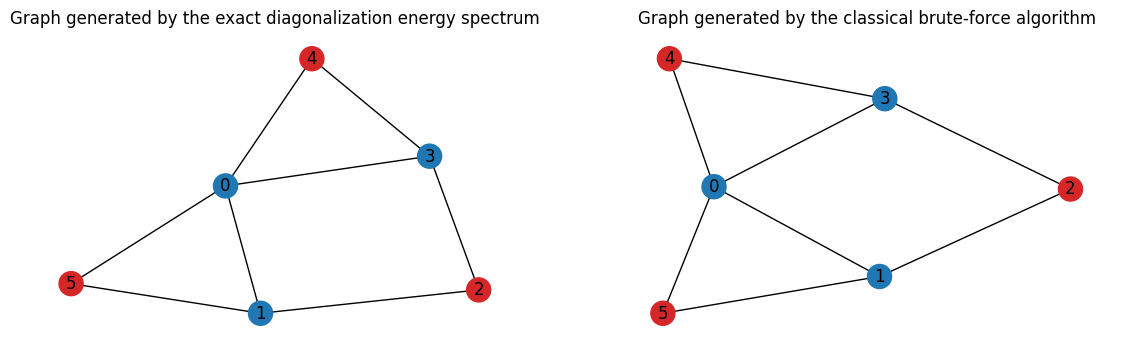

In [18]:

noptions = 2**graph.number_of_nodes() # this scales exponentially with the number of nodes in the graph 
brute_force_solution = ''
ncuts = 0

for i in range(noptions):
    x = np.binary_repr(i, graph.number_of_nodes())
    aux_cuts= num_cuts(str(x),graph)
    if aux_cuts > ncuts:
        ncuts = aux_cuts
        brute_force_solution = str(x)


print("number of cuts in the exact diagonalization solution: ", num_cuts(diagonalized_solution[0][1], graph))
print("number of cuts in the Brute-force solution: ", num_cuts(brute_force_solution, graph))


num_graphs = 2
fig, ax = plt.subplots(ncols=num_graphs, figsize=(14, 4))


color_graph(graph, diagonalized_solution[0][1], ax=ax[0])
color_graph(graph, brute_force_solution, ax=ax[1])

ax[0].set_title("Graph generated by the exact diagonalization energy spectrum")
ax[1].set_title("Graph generated by the classical brute-force algorithm")

plt.show()


## Solving the problem using QAOA

The cost operator can be expressed as:
$$
U(H_c, \gamma) = e^{-i \gamma H_c}
$$

where $\gamma$ is a trainable parameter. 

The mixer Hamiltonian used for this problem can simply be:
$$H_b =  \sum_{i=1}^{N} X_{i} $$

With a the following corresponding unitary operator:
$$
U(H_b, \beta) = e^{-i \beta H_b}.
$$
where $\beta$ is a trainable parameter. 

To define the Mixing hamiltonian we can use Qibo's `SymbolicHamiltonian`:

In [ ]:
def build_mixer_hamiltonian(graph):
    '''
    build the mixer hamiltonian for the given graph.

    args:
        graph: graph
            A network graph

    returns:
        The mixer hamiltonian of the given graph

    '''
    sham = sum((X(i)) for i in range(graph.number_of_nodes() )) 
    
    return hamiltonians.SymbolicHamiltonian(sham)

Then to solve this problem using QAOA, we can construct the QAOA variational circuit and optimize it:

In [19]:
from qibo import models, hamiltonians

# create the mixer Hamiltonian for the given graph
mixer_hamiltonian = build_mixer_hamiltonian(graph)

# create QAOA model given the Hamiltonians
qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)

# optimize using random initial variational parameters with four layers 
n_layers = 4
initial_parameters = 0.01 * np.random.random(n_layers * 2)

# run the QAOA optimization with the initial parameters and the hamiltonians defined 
best_energy, final_parameters, extra = qaoa.minimize(
    initial_parameters, method="BFGS")

print("best energy: ", best_energy)

best energy:  -5.806028683483232


Get the optimal bit-string generated by QAOA:

[('10.15 %', '010100'), ('10.15 %', '101011'), ('9.63 %', '001011'), ('9.63 %', '110100'), ('8.03 %', '010111'), ('8.03 %', '101000'), ('7.62 %', '010101'), ('7.62 %', '101010'), ('7.62 %', '010110'), ('7.62 %', '101001'), ('0.99 %', '000101'), ('0.99 %', '111010'), ('0.99 %', '010010'), ('0.99 %', '101101'), ('0.85 %', '001101'), ('0.85 %', '110010'), ('0.85 %', '011010'), ('0.85 %', '100101'), ('0.46 %', '011011'), ('0.46 %', '100100'), ('0.46 %', '001111'), ('0.46 %', '110000'), ('0.39 %', '000111'), ('0.39 %', '111000'), ('0.39 %', '010011'), ('0.39 %', '101100'), ('0.29 %', '001000'), ('0.29 %', '110111'), ('0.20 %', '001110'), ('0.20 %', '110001'), ('0.20 %', '011001'), ('0.20 %', '100110'), ('0.12 %', '011110'), ('0.12 %', '100001'), ('0.12 %', '011101'), ('0.12 %', '100010'), ('0.11 %', '001001'), ('0.11 %', '110110'), ('0.11 %', '001010'), ('0.11 %', '110101'), ('0.08 %', '011100'), ('0.08 %', '100011'), ('0.06 %', '011111'), ('0.06 %', '100000'), ('0.05 %', '000011'), ('0.05 

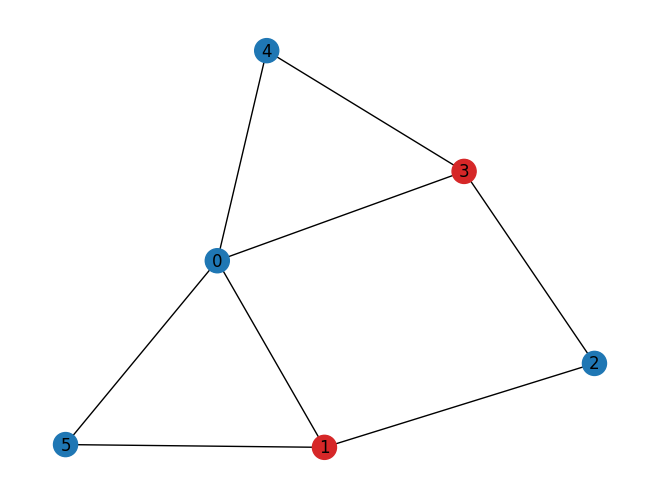

In [20]:
nqubits = graph.number_of_nodes()

qaoa.set_parameters(final_parameters)
quantum_state = qaoa.execute(None)

probabilities = (np.abs(quantum_state) ** 2)
probabilities = zip(probabilities, [i for i in range(len(probabilities))])
probabilities = sorted(probabilities, key=lambda x: x[0], reverse=True)
probabilities = [("{:.2f} %".format(round(p*100, 4)), "{0:0{bits}b}".format(s, bits=nqubits)) for p, s in probabilities]
print(probabilities)
qaoa_solution = probabilities[0][1]
print("-"*10)

print("The best solution is:", qaoa_solution )

color_graph(graph, qaoa_solution)

Compare the results of QAOA to the optimal solution obtained using a classical Brute-force minimization:

number of cuts in the QAOA solution:  6
number of cuts in the Brute-force solution:  6


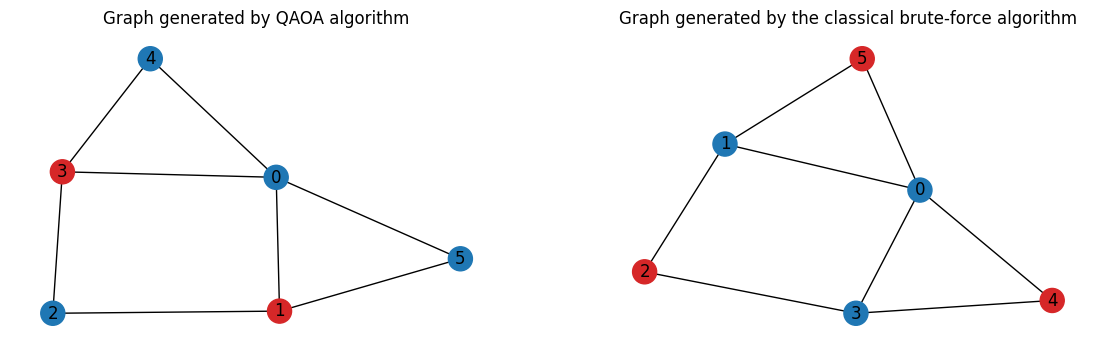

In [21]:
print("number of cuts in the QAOA solution: ", num_cuts(qaoa_solution, graph))
print("number of cuts in the Brute-force solution: ", num_cuts(brute_force_solution, graph))


num_graphs = 2
fig, ax = plt.subplots(ncols=num_graphs, figsize=(14, 4))


color_graph(graph, qaoa_solution, ax=ax[0])
color_graph(graph, brute_force_solution, ax=ax[1])

ax[0].set_title("Graph generated by QAOA algorithm")
ax[1].set_title("Graph generated by the classical brute-force algorithm")

plt.show()


# Solving the problem using Quantum Adiabatic Evolution

For the Adiabatic Quantum Optimization (AQO) we use the same cost hamiltonian that we used for QAOA as our target hamiltonian

$$H_c = - \frac{1}{2} \sum_{j=0}^{N}\sum_{i=0}^{N} w_{ij} (1- Z_{i} * Z_{j}).$$

Moreover, our initial Hamiltonian has to be simple, so that we know its ground state and we can easily prepare it. In this case we use the following Hamiltonian as our initial Hamiltonian :
$$
 H_0 = \sum_{i=0}^{N} X_{i}.
$$


In [22]:
import numpy as np
from qibo.models.evolution import AdiabaticEvolution
from qibo.hamiltonians.hamiltonians import Hamiltonian


# build initial (H0) and target (H1) hamiltonians
H0 = build_mixer_hamiltonian(graph)
H1 = build_cost_hamiltonian(graph)

dt = 0.1
nqubits = graph.number_of_nodes()

# calculate the dense hamiltonian from the symbolic hamiltonian
H1_dense = Hamiltonian(nqubits, H1.calculate_dense().matrix)
H0_dense = Hamiltonian(nqubits, H0.calculate_dense().matrix)

# define scheduling method
def s(t): return t

# construct the adiabatic model
adiabatic_model = AdiabaticEvolution(H0_dense, H1_dense, s, dt)

the solution is:  101011
number of cuts:  6


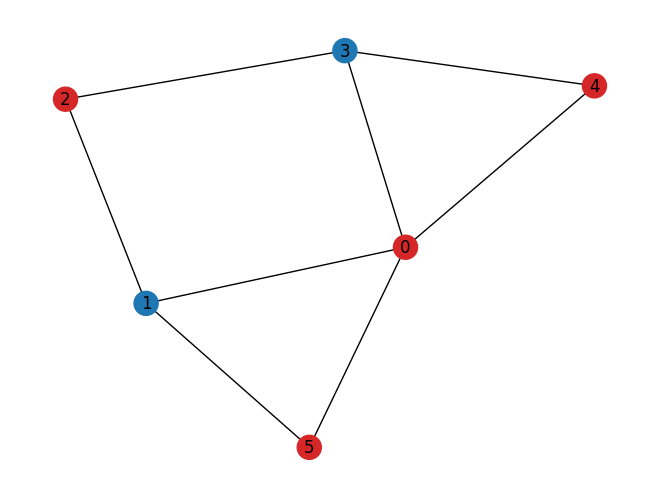

In [23]:
# execute the adiabatic optimization
adiabatic_quantum_state = adiabatic_model.execute(final_time=20)

# obtain the state with the highest probability
solution_dec  = (np.abs(adiabatic_quantum_state) ** 2).argmax()
adiabatic_solution = "{0:0{bits}b}".format(solution_dec, bits=nqubits)


print("the solution is: ", adiabatic_solution)
print("number of cuts: ", num_cuts(adiabatic_solution, graph))

color_graph(graph, adiabatic_solution)


number of cuts in the Quantum Annealing solution:  6
number of cuts in the Brute-force solution:  6


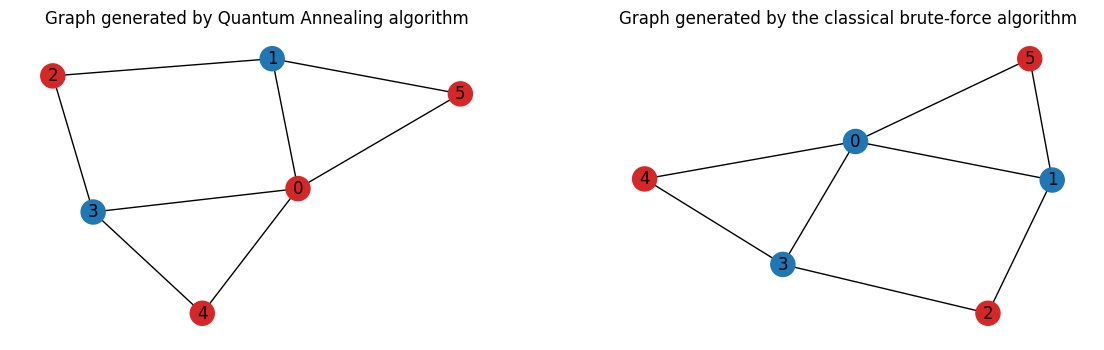

In [24]:
print("number of cuts in the Quantum Annealing solution: ", num_cuts(adiabatic_solution, graph))
print("number of cuts in the Brute-force solution: ", num_cuts(brute_force_solution, graph))


num_graphs = 2
fig, ax = plt.subplots(ncols=num_graphs, figsize=(14, 4))


color_graph(graph, adiabatic_solution, ax=ax[0])
color_graph(graph, brute_force_solution, ax=ax[1])

ax[0].set_title("Graph generated by Quantum Annealing algorithm")
ax[1].set_title("Graph generated by the classical brute-force algorithm")

plt.show()
